In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'USERNAME'

os.environ['KAGGLE_KEY'] = 'KEY'
os.environ["KAGGLE_CONFIG_DIR"] = "/path_to_your_kaggle.json_file"

In [2]:
!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 10.3MB/s]


In [3]:
import zipfile
with zipfile.ZipFile('/content/insurance.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [100]:
df = pd.read_csv("insurance.csv")
pd.get_option("display.max_columns")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
df.shape

(1338, 7)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [103]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [104]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [105]:
df.drop(['sex','smoker','region'],axis=1, inplace=True)

In [106]:
df['charges'] = df['charges'].fillna(df['charges'].mean())

In [107]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [108]:
df['children'] = df['children'].fillna(1)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [110]:
df.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['bmi','charges']] = scaler.fit_transform(df[['bmi','charges']])

In [112]:
df.drop(['bmi','children'],axis=1, inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   charges  1338 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 21.0 KB


In [114]:
X = df.drop(['charges'],axis=1)
y = df['charges']

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)


In [116]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [120]:
lr.score(X_test,y_test)

0.07987312445951267

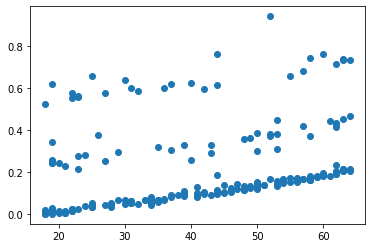

In [123]:
plt.scatter(X_test,y_test)
plt.show()